## Greg Lee-Podgorski -  Head of Machine Learning & Technology Platforms @ RS

# CLUSTERING - product segmentation for marketing 

 ## I. Define & Scope

 **The Brief**

#### `Based on internal RS corporate data on best-selling products we carry, use clustering algorithm (k-means) to group them together into clusters, using multiple features available in the dataset, so that our online marketing team can customize their ad campaigns to promote key product groups more effectively. Then create a visualization of the resulting analysis. Draw conclusions, if findings allow it.`

**i) Intro**

In this notebook I'm going to apply clustering method(s) of Machine Learning to our best-selling products in RS Components product catalogue. While clustering algorithms consist of a number of algorithms available to be used, from hierarchical, through Fuzzy C-means to GMM (Gaussian Mixed Models), none of those is perfect. i'm going to utilize probably most commonly used clustering algorithm, namely k-means to mine for commonalities among those top selling products, trying to determine how they can be best split into a number of clusters and grouped into them, hoping to find some hidden patterns or shared characteristics.

**ii) Background**

RS Components is a publicly listed corporation and trades on LSE (London Stock Exchange) under Electrocomponents PLC trade name. We have significant trading presence in each of the top economically most active regions - EMEA, APAC and Americas.
Due to wildly varying standards across any number of electronic products specifications that have local requirements, whether voltage, number of prongs/holes in a electric socket, certification standards or just local engineer's preferences, standarization is a challenge for RS and thus we need to stock very large range of products. As it stands RS currently has over 500,000 SKU's (over 0.5 million product in stock) and over 2.5 million non-stock products which we can drop-ship for our clients from our global supplier base. That means that while most of online stores would be content with coming up with a Top 100 best selling products, out Best Sellers list features slightly over 10,000 products. Some of the products on that best-sellers' list vary only slightly from their "cousins", e.g. by different AC/DC output or electrical resistance (in Ohms).

To make matters even more complicated we carry a number of distinct categories of products, e.g. BLE (Board Level Electronics) - something a computer maker like Asus or Dell would need, or IA&C (Undustrial Automation & Control) - e.g. assembly line sensors monitoring health of a conveyor belt, or PPE (Personal Protection Equipment) - e.g. gloves or protective masks engineers or doctors can cover their faces with.

**iii) Problem statement and potential business application**

With such huge range or products covering a number of distinct categories and sourced from over 2500 unique suppliers across different geographies, it's little wonder that our investory management function is 3-digit strong when it comes to headcount and inventory planners are always playing a catch-up game.
Whether it comes to updating ERP system with up-to-date stock counts from a number of out trade counters (brick and mortar store locations), keeping track what's about to run out in our warehouses located in key countries globally or even trying to assign priorities correctly across several different team within Inventory Management, while RS as a company noticeably improved our approach to managing stock, we are surely in need of further improvements. Those will be difficult to come by and even more so - to implement - unless we manage to identify signicant patterns in underlying data.

Grouping best-selling products based on features such as number of web page views, additions to cars, revenue generated, number of customers who backed out of buying it - who knows what nuggets of knowledge are hidden from our eyes. It's my hope that perhaps k-means will help shine some light onto those hidden shared characteristics and perhaps those will be of significant enough importance that it will warrant changes in the way inventory mgmt teams operate.
More importantly, our Marketing function has been observing a steady cost creep to their online ad campaigns, yet effectiveness of those campaigns seem to be declining over time (as evidence by conversion rate metric). It's our hope, here at Machine Learning team, that regrouping key product categories via clustering model, key reveal a better way to group our products and thus arm our marketing team with more efficient way to promote those key product groups.

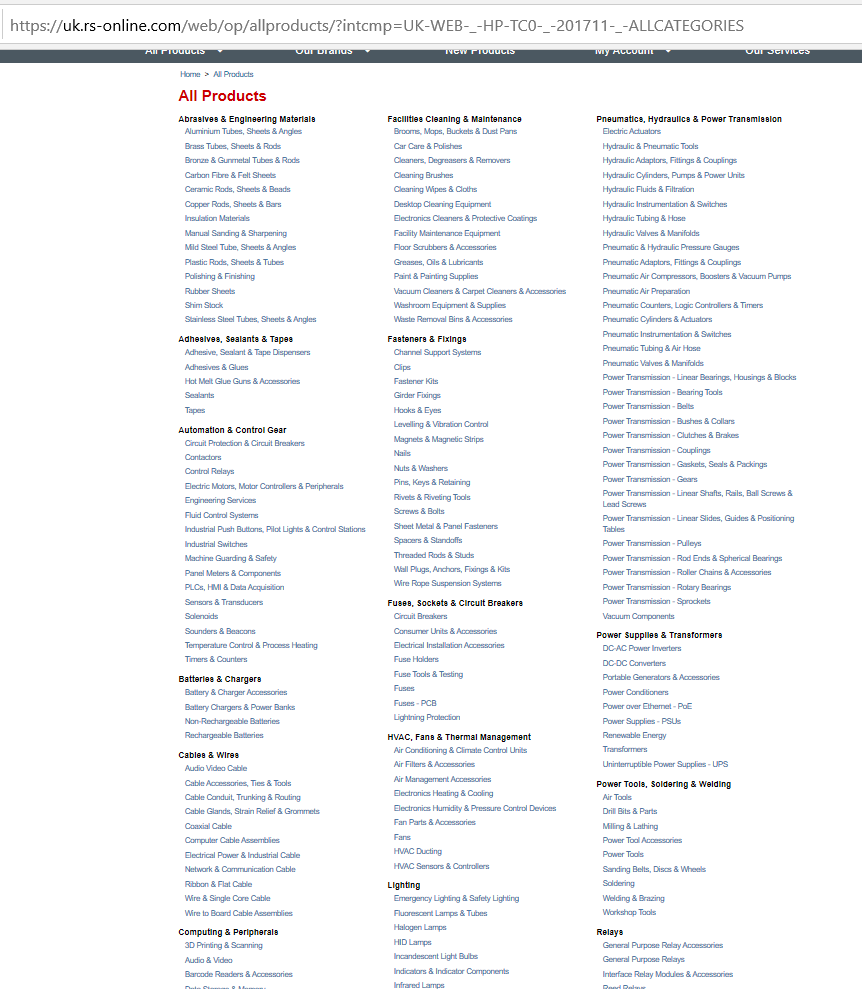

**iv) Data**

The dataset has been sourced internally, with a help of a product analyst, who is a part of inventory management function and looks after best-selling products, making sure they are in stock with maximum availability.
The Excel files utilized here has over 11,000 rows with multiple columns providing information such as Category, Technology type, number of orders, etc.

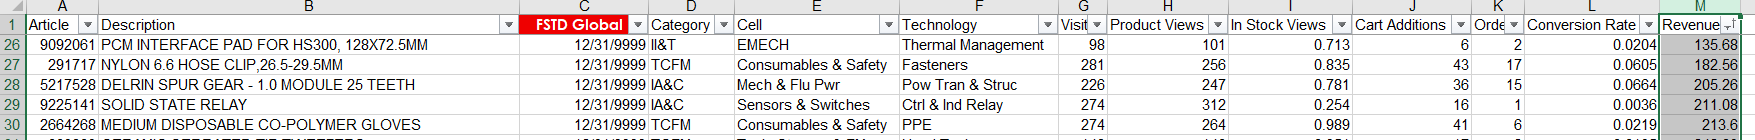

**v) Data protection**

The dataset used doesn't contain any customer-related info (other than number of orders and views in our online store) so there is no personally-identifiable information available. Thus there is no risk of any GDPR violation.
As far as corporate data is concerned, there is no strictly confidential data being used. Almost all of the data used is publicaly available on our web store. The only potentially sensitive data in there is revenue generated by each of the top selling products. If accessed in its entirety, one could imagine a potential risk of a competitor being able to peek behind the curtain and try to replicate - say - our Top 1000 selling products and undercutting our pricing. To avoid that, I have sorted revenue in ascending order and never show the column content - only few rows at a time.

## Loading libraries

In [1]:
# pandas for dataframe manipulation
import pandas as pd

# Seaborn and matplotlib for plotting results
import seaborn as sns
import matplotlib.pyplot as plt

# import function to scale our data so that we can perform sensible clustering
from sklearn.preprocessing import MinMaxScaler

# KMeans to provide the implementation of our clustering algorithm
from sklearn.cluster import KMeans

## Sourcing data

In [2]:
topsells = pd.read_excel("..\Top Sellers Digital Data_KP.xlsx")

In [3]:
topsells.tail()

,Article,Description,FSTD Global,Category,Cell,Technology,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate,Revenue
11453,7609005,ALUMINIUM PAINT ENCLOSURE 160X160X90MM,9999-12-31 00:00:00,IA&C,Mach Guard & Enc,Enclosures,390,383,0.713,63,38,0.0974,4466.22
11454,4992470,PIPE CLEANING BRUSH FOR 15MM DIA PIPE,9999-12-31 00:00:00,TCFM,Tools Storage & FM,Hand Tools,1194,1125,0.998,224,131,0.1097,2293.60
11455,1257961,INDUSTRIAL CABLE 10MM2 10M,9999-12-31 00:00:00,II&T,"Cable, Anti-Vib & Ac",Elec & Data Cable,291,335,0.289,31,11,0.0378,1502.59
11456,3971315,"MINERAL INSULATED PT 100 SENSOR,3X150MM",9999-12-31 00:00:00,IA&C,Sensors & Switches,Proc Auto Sen,392,408,0.997,51,26,0.0663,3176.67
11457,2414782,"ADHESIVE BASE MICRO WIRE SADDLE,9X7.3MM",9999-12-31 00:00:00,II&T,"Cable, Anti-Vib & Ac",Cable Accs,591,561,0.996,97,59,0.0998,1220.76


## Exploring, Cleaning & Transforming data

### Exploring

Let's first have a quick look at what type data and its shape we are dealing with..

In [4]:
topsells.shape

(11458, 13)

As we can see, our dataframe has almost 11,500 rows and 13 columns

In [5]:
topsells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11458 entries, 0 to 11457
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Article          11458 non-null  int64  
 1   Description      11458 non-null  object 
 2   FSTD Global      11458 non-null  object 
 3   Category         11458 non-null  object 
 4   Cell             11458 non-null  object 
 5   Technology       11458 non-null  object 
 6   Visits           11458 non-null  int64  
 7   Product Views    11458 non-null  int64  
 8   In Stock Views   11458 non-null  float64
 9   Cart Additions   11458 non-null  int64  
 10  Orders           11458 non-null  int64  
 11  Conversion Rate  11458 non-null  float64
 12  Revenue          11458 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


Good news - no null values in any of the rows - that doesn't happen often. I guess my colleague made sure the dataset has been of proper quality.

We can see that majority of the columns contain numerical values, while remaining 5 (column 2 - col 6) columns have categorical records.

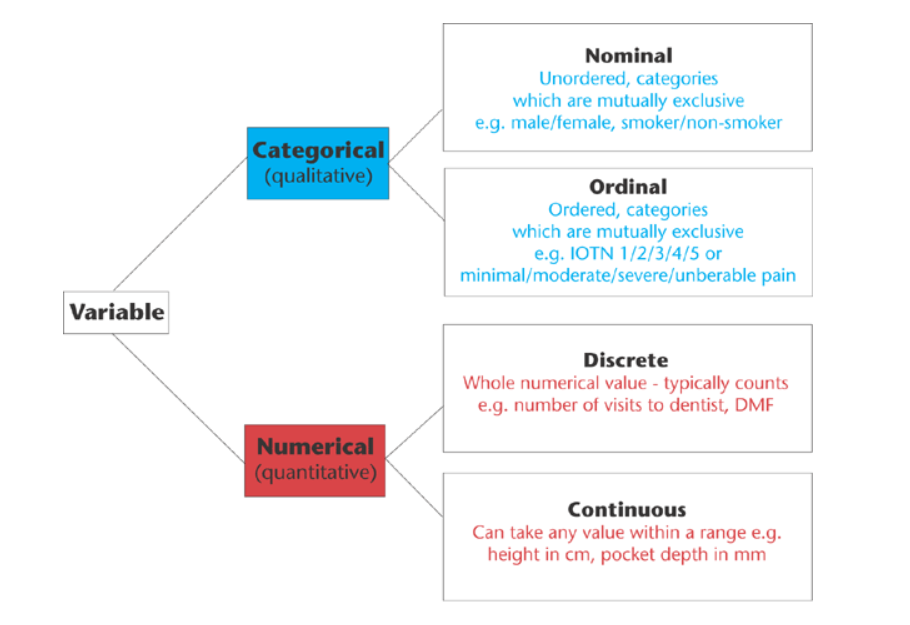

As per above dichotomy, we can see that columns 2,4,5 and 6 contain nominal values, while column 3 (FSTD Global) appears to contain ordinal variables.

In [6]:
topsells.dtypes

Article              int64
Description         object
FSTD Global         object
Category            object
Cell                object
Technology          object
Visits               int64
Product Views        int64
In Stock Views     float64
Cart Additions       int64
Orders               int64
Conversion Rate    float64
Revenue            float64
dtype: object

We can further see that columns Visits, Product Views, cart additions and Orders contain whole numbers (aka integral = integers) while columns In Stock Views, Conversion rate and Revenue contain fractionals (in this case 64-bit floating point data types).

 #### Interesting trivia - Nonintegral Numeric Types:

Nonintegral data types are those that represent numbers with both integer and fractional parts.
The nonintegral numeric data types are Decimal (128-bit fixed point), Single Data Type (32-bit floating point), and Double Data Type (64-bit floating point). They are all signed types. If a variable can contain a fraction, declare it as one of these types.
Decimal is not a floating-point data type. Decimal numbers have a binary integer value and an integer scaling factor that specifies what portion of the value is a decimal fraction.
You can use Decimal variables for money values. The advantage is the precision of the values. The Double data type is faster and requires less memory, but it is subject to rounding errors. The Decimal data type retains complete accuracy to 28 decimal places.
Floating-point (Single and Double) numbers have larger ranges than Decimal numbers but can be subject to rounding errors. Floating-point types support fewer significant digits than Decimal but can represent values of greater magnitude.

### Cleaning

We are lucky - there doesn't seem to be a need for further data cleaning at this point.
If that need arises, I'll do it on the fly.

### Investigating

Let's see now what are the most commonly ordered products:

In [7]:
topsells.sort_values(by=['Orders'], ascending=False).head(1)

,Article,Description,FSTD Global,Category,Cell,Technology,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate,Revenue
14,8660672,RS LITHIUM COIN CELL CR2032 5PK,9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,45475,28009,0.977,19733,11838,0.2603,116284.19


Oh, the revenue...
I'm going to hide it, as not to reveal too much at this stage:

In [8]:
topsellshider=topsells.drop(['Revenue'], axis=1)

In [9]:
topsellshider.head(7)

,Article,Description,FSTD Global,Category,Cell,Technology,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate
0,233487,"BLACK CABLE TIE, 300X4.8MM, PACK 100",9999-12-31 00:00:00,II&T,"Cable, Anti-Vib & Ac",Cable Accs,43371,28655,0.996,16065,9658,0.2227
1,5375488,"RS SEALED LEAD-ACID BATTERY,12V 7AH",9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,40171,41566,0.992,6666,3611,0.0899
2,7348885,88PC 1/2IN. SOCKET & VDE TOOL KIT,9999-12-31 00:00:00,TCFM,Tools Storage & FM,Hand Tools,79286,89157,0.970,2373,789,0.0100
3,1681644,DUST REMOVER CLEANER 400ML,9999-12-31 00:00:00,TCFM,Consumables & Safety,"Adhesives, Clean & M",8704,8340,0.933,2245,1517,0.1743
4,6191506,"SEALING STRIP,PVC,WIRE INSERT,1-2,9X6.",9999-12-31 00:00:00,TCFM,Consumables & Safety,Fasteners,9605,9731,0.997,2152,1556,0.1620
5,8412518,"ELECTRONIC CALIPER 150MM/6""",9999-12-31 00:00:00,TCFM,Tools Storage & FM,Measurement & Insp,35240,34067,0.997,6000,3001,0.0852
6,100282,"BRASS SLOT'D SCREW,NUT & WASHER KIT",9999-12-31 00:00:00,TCFM,Consumables & Safety,Fasteners,1609,1760,0.998,106,48,0.0298


ok, now we can safely go back to seeing most frequently ordered products:

In [10]:
topsellshider.sort_values(by=['Orders'], ascending=False).head(10)

,Article,Description,FSTD Global,Category,Cell,Technology,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate
14,8660672,RS LITHIUM COIN CELL CR2032 5PK,9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,45475,28009,0.977,19733,11838,0.2603
89,7757233,LR44 ALKALINE COIN CELL 1.5V 158MAH,9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,51456,37928,0.997,18331,10758,0.2091
0,233487,"BLACK CABLE TIE, 300X4.8MM, PACK 100",9999-12-31 00:00:00,II&T,"Cable, Anti-Vib & Ac",Cable Accs,43371,28655,0.996,16065,9658,0.2227
29,512238,"PTFE THREAD SEAL TAPE,12M L X 12MM W",9999-12-31 00:00:00,TCFM,Consumables & Safety,"Adhesives, Clean & M",36293,26000,0.997,12460,8293,0.2285
157,233455,"CABLE TIE,100 X 2.5,BLACK,PACK 100",9999-12-31 00:00:00,II&T,"Cable, Anti-Vib & Ac",Cable Accs,27824,17143,0.996,11291,7192,0.2585
72,458702,"RED INSUL BOOTLACE FERRULE,8MMPIN 1MMSQ.",9999-12-31 00:00:00,II&T,I-Conn,Crimp Term & Power,29405,19737,0.997,10964,6747,0.2295
33,7442199,NON-RECHARGEABLE AA ALKALINE BATTERY,9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,22215,13742,0.996,9217,6186,0.2785
36,458718,"BLK INSUL BOOTLACE FERRULE,1.5MMSQ. WIRE",9999-12-31 00:00:00,II&T,I-Conn,Crimp Term & Power,29259,19750,0.995,10389,6125,0.2093
26,593423,"RS SR44 COIN CELL BATTERY, 1.55V",9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,23043,17434,0.995,8855,5404,0.2345
138,467406,"STANDARD TOP HAT PUNCHED DIN RAIL,0.5M",9999-12-31 00:00:00,IA&C,Mach Guard & Enc,Enclosures,32740,25221,0.997,8431,5123,0.1565


It looks like batteries and cables are most popular among our customers.

Now let's find out which products got most eyeballs (but not necessarily most orders):

In [11]:
topsellshider.sort_values(by=['Product Views'], ascending=False).head(10)

,Article,Description,FSTD Global,Category,Cell,Technology,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate
2,7348885,88PC 1/2IN. SOCKET & VDE TOOL KIT,9999-12-31 00:00:00,TCFM,Tools Storage & FM,Hand Tools,79286,89157,0.970,2373,789,0.0100
1293,8179236,"55PC BIT AND SOCKET SET 1/4"" DRIVE",9999-12-31 00:00:00,TCFM,Tools Storage & FM,Hand Tools,55287,58233,0.730,867,318,0.0058
1,5375488,"RS SEALED LEAD-ACID BATTERY,12V 7AH",9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,40171,41566,0.992,6666,3611,0.0899
89,7757233,LR44 ALKALINE COIN CELL 1.5V 158MAH,9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,51456,37928,0.997,18331,10758,0.2091
397,7613319,PROFILE 8 40X40 LIGHT 1M,9999-12-31 00:00:00,IA&C,Mech & Flu Pwr,Pow Tran & Struc,28691,37330,0.995,1736,530,0.0185
58,1231938,RS PRO COMPACT MULTIMETER AUTORANGING,9999-12-31 00:00:00,II&T,Test & Measurement,Electrical T&M,33038,36788,0.997,4470,2365,0.0716
84,7348889,94PC MECHANICS TOOL KIT,9999-12-31 00:00:00,TCFM,Tools Storage & FM,Hand Tools,30977,34490,0.983,1758,611,0.0197
5,8412518,"ELECTRONIC CALIPER 150MM/6""",9999-12-31 00:00:00,TCFM,Tools Storage & FM,Measurement & Insp,35240,34067,0.997,6000,3001,0.0852
273,1251266,LI-POLYMER BATTERY 3.7V 2000MAH,9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,25953,30361,0.997,1765,761,0.0293
5372,7698736,"CLEAR POLYCARBONATE SHEET, 305X625X3MM",9999-12-31 00:00:00,TCFM,Consumables & Safety,Engineering Mat,27735,30288,0.998,735,315,0.0114


Pandas is telling us that it wasn't batteries or cables but, actually, sockets. Interesting.
It would appear that conversion rate of sockets is noticeably lower than that of the 2 former groups.
Perhaps it's driven by price. Either way - interesting fact...

Finally, let's learn which product was least often in stock, when viewed:

In [12]:
topsellshider.sort_values(by=['In Stock Views']).head(10)

,Article,Description,FSTD Global,Category,Cell,Technology,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate
1622,6693677,THREE STEP MOBILE PLATFORM,9999-12-31 00:00:00,TCFM,Tools Storage & FM,"Acc, Stor & Mat Hand",0,0,0.000,0,0,0.0000
8995,1777087,OIL FILLED RADIATOR 2KW 9FIN UK PLUG,9999-12-31 00:00:00,TCFM,Tools Storage & FM,HVAC,8,0,0.000,7,0,0.0000
6164,9076422,"5/2 PILOT OPERATED SOLENOID VALVE, G1/2""",9999-12-31 00:00:00,IA&C,Mech & Flu Pwr,Pneumatics,190,222,0.009,4,0,0.0000
10254,8938534,FUSE KIT 6.3X32 FAST AND SLOW GLASS 250V,9999-12-31 00:00:00,II&T,EMECH,Fuses,1921,1922,0.051,262,95,0.0495
10273,7761989,ORANGE 3 CORE ARCTIC CABLE 2.5MM 100M,2024-12-19 00:00:00,II&T,"Cable, Anti-Vib & Ac",Pwr & Ind Cable,520,542,0.174,61,14,0.0269
6567,542093,30 PIECE ENGINEERS ZIPPED TOOL KIT,9999-12-31 00:00:00,TCFM,Tools Storage & FM,Hand Tools,2064,2264,0.189,38,10,0.0048
362,9225141,SOLID STATE RELAY,9999-12-31 00:00:00,IA&C,Sensors & Switches,Ctrl & Ind Relay,274,312,0.254,16,1,0.0036
3157,6211694,GENERAL STORAGE CAB 457X915X1830MM,9999-12-31 00:00:00,TCFM,Tools Storage & FM,"Acc, Stor & Mat Hand",951,1116,0.271,46,10,0.0105
7931,1615878,CABLE LOCKOUT SAFETY PADLOCK W/1FT CABLE,9999-12-31 00:00:00,TCFM,Consumables & Safety,Site Safety & Janit,1085,1170,0.276,165,51,0.0470
11455,1257961,INDUSTRIAL CABLE 10MM2 10M,9999-12-31 00:00:00,II&T,"Cable, Anti-Vib & Ac",Elec & Data Cable,291,335,0.289,31,11,0.0378


I won't pretend to be able to exlain what's so special about solenoid valve but it looks like it was viewed 222 times and was only in stock less than %1 of those times. And fuse kit was clicked on to view 1921 times and yet it was available for purchase only 5.1% of the time...

## Visualizing the data

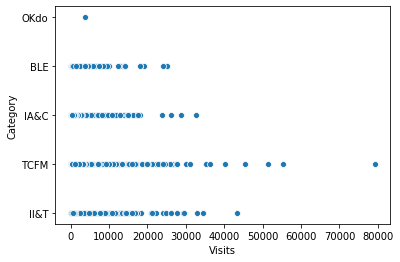

In [13]:
# create a scatter plot of Category vs. Visits using the scatterplot() function from Seaborn
sns.scatterplot(x = topsellshider['Visits'], y = topsellshider['Category'])

In [14]:
#Learning what unique values exist in the Cell column:
topsellshider.Cell.unique()

array(['Cable, Anti-Vib & Ac', 'Consumables & Safety',
       'Tools Storage & FM', 'I-Conn', 'Sensors & Switches',
       'Process Control', 'Mach Guard & Enc', 'E-Conn',
       'Test & Measurement', 'Passives', 'EMECH', 'Mech & Flu Pwr',
       'BLE E-Mech', 'Opto', 'Analog Disc Power', 'SBC & IOT'],
      dtype=object)

In [15]:
# Chehcking the amount of unique values in the Technology column:
topsellshider.Technology.value_counts()

Fasteners               1376
Hand Tools               639
Acc, Stor & Mat Hand     562
Cable Accs               528
Pwr & Ind Cable          500
                        ... 
Sensors                    4
LED                        4
Displays                   3
Power PCB                  3
SBC IOT Dev. Tools         1
Name: Technology, Length: 67, dtype: int64

In [16]:
#I'm going to drop some columns temporarily to be able to use heatmap type of plot in Seaborn:
topsellshider2=topsellshider.filter(['Cell','Technology','Conversion Rate'])

In [17]:
topsellshider2.head(10)

,Cell,Technology,Conversion Rate
0,"Cable, Anti-Vib & Ac",Cable Accs,0.2227
1,Consumables & Safety,Battery,0.0899
2,Tools Storage & FM,Hand Tools,0.0100
3,Consumables & Safety,"Adhesives, Clean & M",0.1743
4,Consumables & Safety,Fasteners,0.1620
5,Tools Storage & FM,Measurement & Insp,0.0852
6,Consumables & Safety,Fasteners,0.0298
7,I-Conn,Crimp Term & Power,0.1639
8,Tools Storage & FM,HVAC,0.0136
9,Tools Storage & FM,Hand Tools,0.1653


<Figure size 576x2520 with 0 Axes>

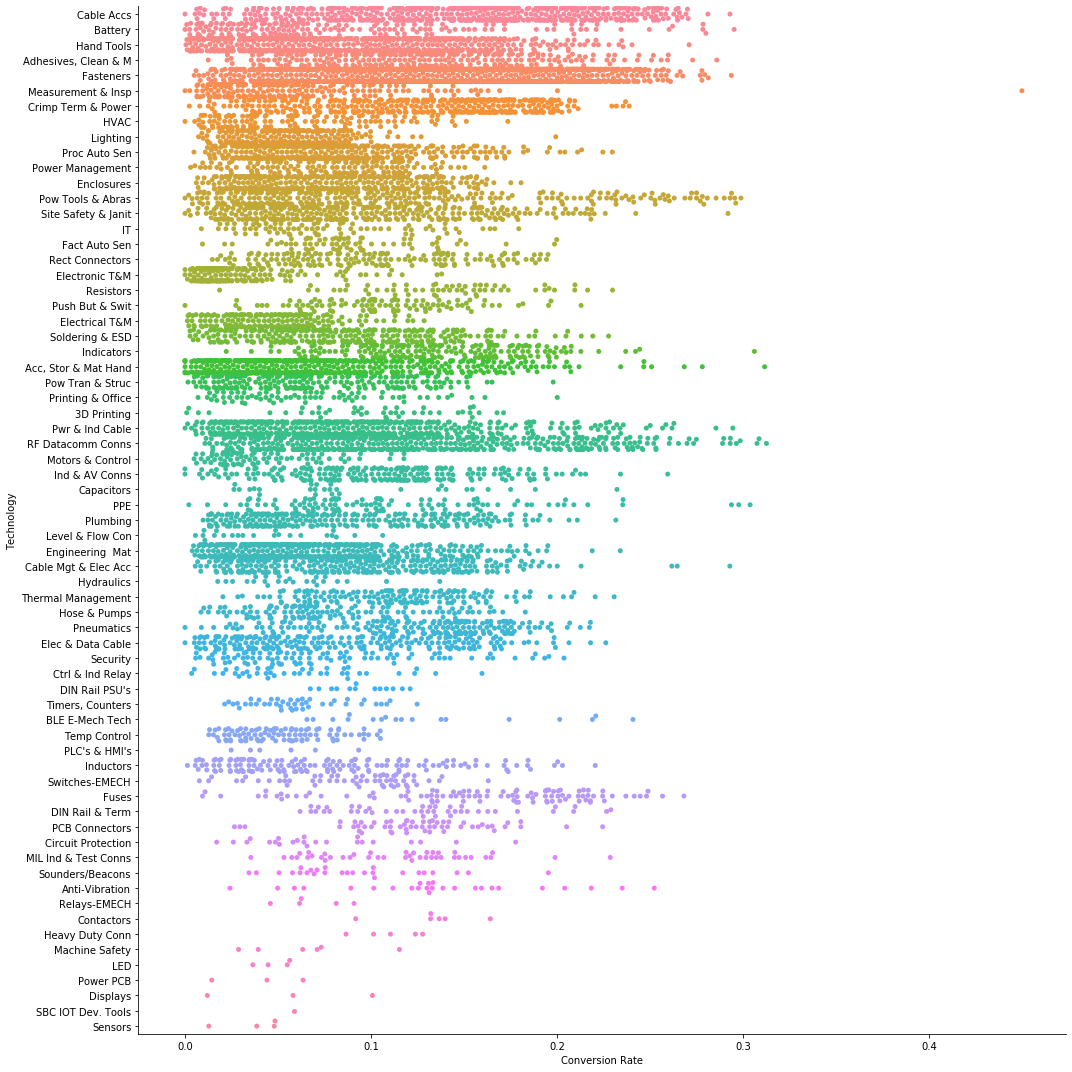

In [18]:
plt.figure(figsize=(8,35))
sns.catplot(data=topsellshider2, x="Conversion Rate", y="Technology", kind="swarm", ci=0, aspect=1, height=15)

It would appear that Hand Tools and Hydration Ventilation Air Conditioning categories have the lowest conversion rates.

<Figure size 2304x576 with 0 Axes>

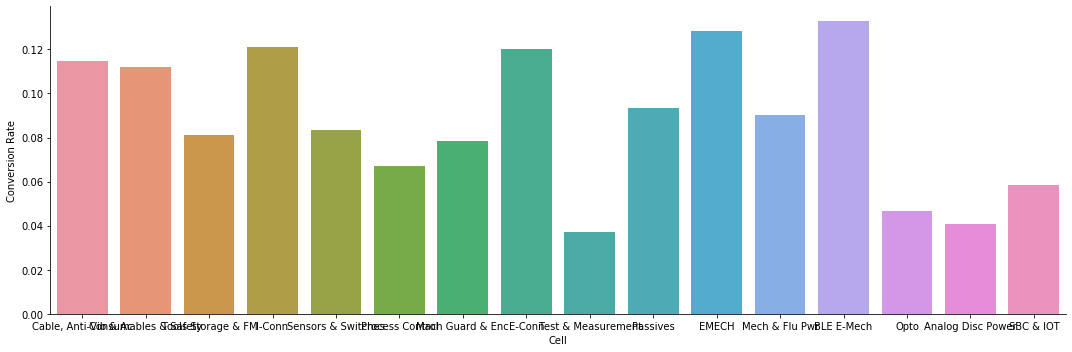

In [19]:
plt.figure(figsize=(32,8))
sns.catplot(data=topsellshider2, x="Cell", y="Conversion Rate", kind="bar", ci=0, height=5, aspect = 3)

<Figure size 1296x504 with 0 Axes>

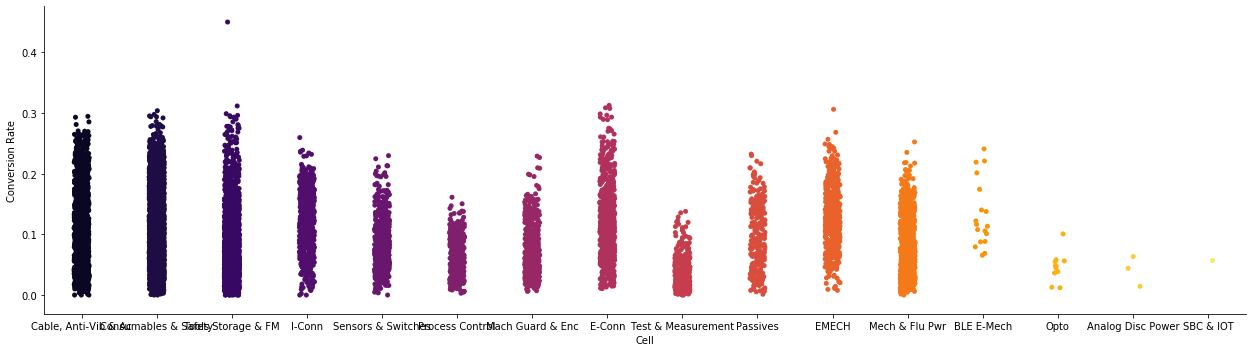

In [20]:
plt.figure(figsize=(18,7)) # default is inches
graph=sns.catplot(data=topsellshider2, x="Cell", y="Conversion Rate", palette="inferno", aspect=3.5)
# pad is space under title
plt.box(on=1)

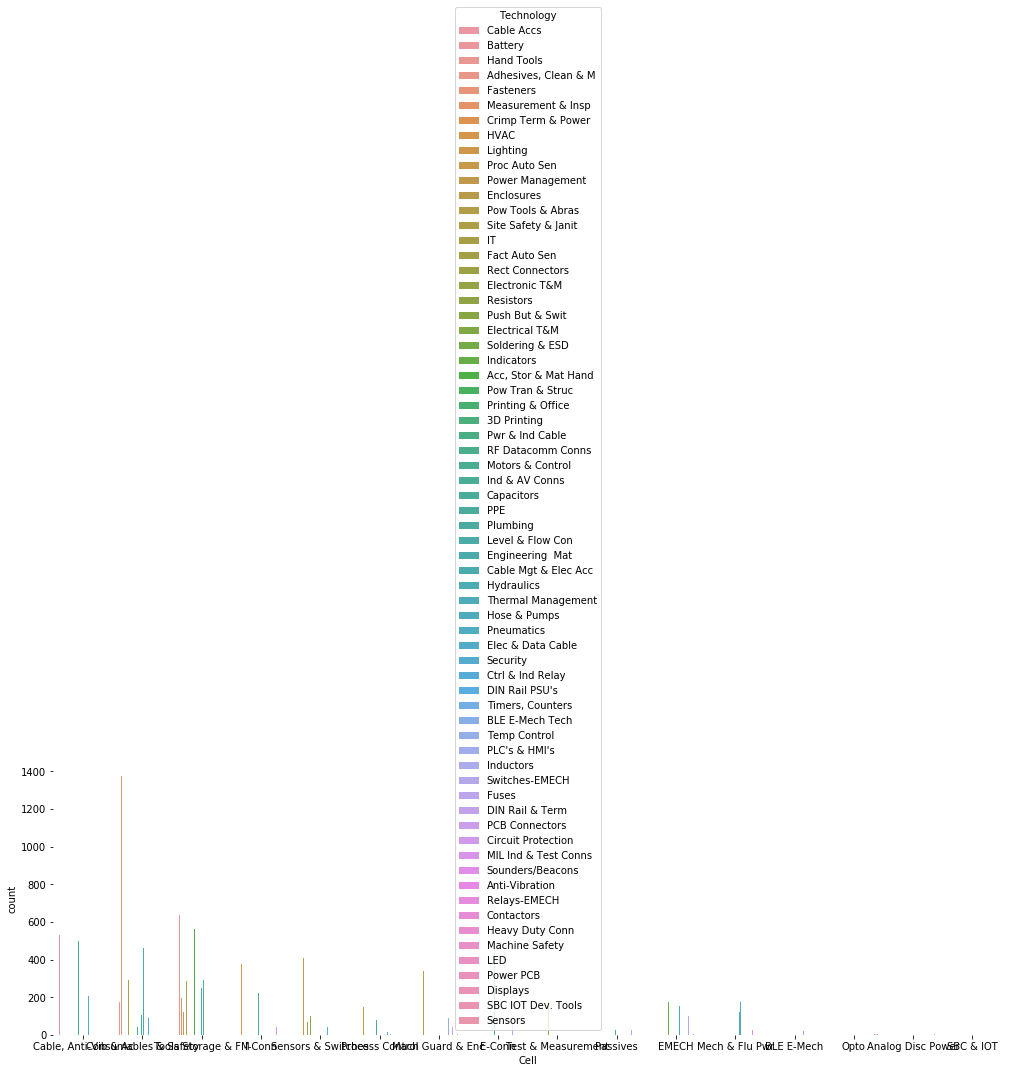

In [21]:
plt.figure(figsize=(17,5)) # default is inches
sns.countplot(data=topsellshider, x="Cell", hue="Technology")
plt.box()

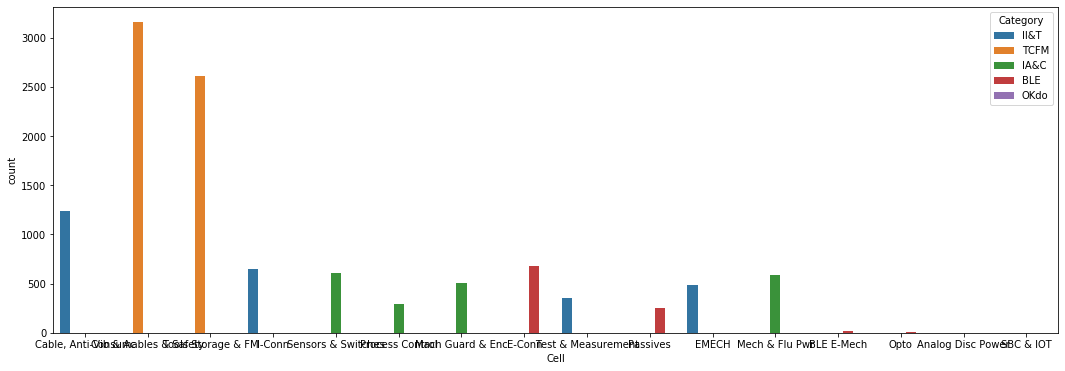

In [22]:
plt.figure(figsize=(18,6)) # default is inches
sns.countplot(data=topsellshider, x="Cell", hue="Category")
plt.show()

## Modelling with K-Means

Let's remind ourselves what the dataframe looks like:

In [23]:
topsellshider.head()

,Article,Description,FSTD Global,Category,Cell,Technology,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate
0,233487,"BLACK CABLE TIE, 300X4.8MM, PACK 100",9999-12-31 00:00:00,II&T,"Cable, Anti-Vib & Ac",Cable Accs,43371,28655,0.996,16065,9658,0.2227
1,5375488,"RS SEALED LEAD-ACID BATTERY,12V 7AH",9999-12-31 00:00:00,TCFM,Consumables & Safety,Battery,40171,41566,0.992,6666,3611,0.0899
2,7348885,88PC 1/2IN. SOCKET & VDE TOOL KIT,9999-12-31 00:00:00,TCFM,Tools Storage & FM,Hand Tools,79286,89157,0.970,2373,789,0.0100
3,1681644,DUST REMOVER CLEANER 400ML,9999-12-31 00:00:00,TCFM,Consumables & Safety,"Adhesives, Clean & M",8704,8340,0.933,2245,1517,0.1743
4,6191506,"SEALING STRIP,PVC,WIRE INSERT,1-2,9X6.",9999-12-31 00:00:00,TCFM,Consumables & Safety,Fasteners,9605,9731,0.997,2152,1556,0.1620


In [24]:
topsellshider.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11458 entries, 0 to 11457
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Article          11458 non-null  int64  
 1   Description      11458 non-null  object 
 2   FSTD Global      11458 non-null  object 
 3   Category         11458 non-null  object 
 4   Cell             11458 non-null  object 
 5   Technology       11458 non-null  object 
 6   Visits           11458 non-null  int64  
 7   Product Views    11458 non-null  int64  
 8   In Stock Views   11458 non-null  float64
 9   Cart Additions   11458 non-null  int64  
 10  Orders           11458 non-null  int64  
 11  Conversion Rate  11458 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.0+ MB


K-means only accepts numerical values in columns so we'll need to drop all the columns with categorical variables in them.
I'll also drop Article column since while it has integral numbers in that column, it's just a way to indetify a product and we don't need it to pass it on to k-means.

In [25]:
topsellshider_nrs=topsellshider.filter(['Visits','Product Views','In Stock Views','Cart Additions','Orders','Conversion Rate'])

In [26]:
topsellshider_nrs.head(8)

,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate
0,43371,28655,0.996,16065,9658,0.2227
1,40171,41566,0.992,6666,3611,0.0899
2,79286,89157,0.970,2373,789,0.0100
3,8704,8340,0.933,2245,1517,0.1743
4,9605,9731,0.997,2152,1556,0.1620
5,35240,34067,0.997,6000,3001,0.0852
6,1609,1760,0.998,106,48,0.0298
7,18232,17077,0.998,4412,2989,0.1639


Let's double-check:

In [27]:
topsellshider_nrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11458 entries, 0 to 11457
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Visits           11458 non-null  int64  
 1   Product Views    11458 non-null  int64  
 2   In Stock Views   11458 non-null  float64
 3   Cart Additions   11458 non-null  int64  
 4   Orders           11458 non-null  int64  
 5   Conversion Rate  11458 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 537.2 KB


OK. No numerical values anymore.

##### Scaling - standardize/normalize numbers:

First we need to make sure all variables are on the same scale, as currently In Stock Views and Conversion Rate are in % and thus in the order of magnitude of 0.01 and other columns are from 10's to being in the 4th order of magnitude (10000s). If we model the data as is, the Kmeans algorithm will skew away from % values and towards the variables with largest orders of magnitude, as any differences in distance will be more significant -- i.e. distance between Conversion Rate of 0.1743 and 0.1620 is only 0.0123 units, which on the Cart Additions axis would only equate to the distance between say, 10,000 and 10,000.0123!
Hence, we need to scale to give variables equal weighting when clustering. There are two main ways to do this: 
Standardise: convert all to values in the range of 0-1
Normalise: convert all to values that have a mean of 0, and a standard deviation of 1 -- i.e. convert them such that they would lie on a normal distribution

For this situation we will stick to only standardising, as assuming a normal distribution gives too much weight to the mean of the data (which may not be relavant at all!).

In [28]:
# To standardise, we can use the MinMaxScaler functions from Sklearn
data_scaled = MinMaxScaler().fit_transform(topsellshider_nrs)

## If you would rather normalise the data, you could use the 'scale' function -- i.e. 
# data_scaled = scale(data)

In [29]:
data_scaled

array([[5.47019650e-01, 3.21399329e-01, 9.96000000e-01, 8.14118482e-01,
        8.15847271e-01, 4.94778938e-01],
       [5.06659435e-01, 4.66211290e-01, 9.92000000e-01, 3.37809760e-01,
        3.05034634e-01, 1.99733393e-01],
       [1.00000000e+00, 1.00000000e+00, 9.70000000e-01, 1.20255410e-01,
        6.66497719e-02, 2.22172850e-02],
       ...,
       [3.67025704e-03, 3.75741669e-03, 2.89000000e-01, 1.57097248e-03,
        9.29211015e-04, 8.39813375e-02],
       [4.94412633e-03, 4.57619705e-03, 9.97000000e-01, 2.58450312e-03,
        2.19631695e-03, 1.47300600e-01],
       [7.45402719e-03, 6.29227094e-03, 9.96000000e-01, 4.91562357e-03,
        4.98394999e-03, 2.21728505e-01]])

It appears to have worked.

We can now proceed to the actual modelling:

In [30]:
# create the KMeans model object with a number of clusters k. 
model = KMeans(n_clusters = 3, random_state= 123)

##### Note:

Machine learning algorithms (both supervised and unsupervised) are inherently stochastic (or probabilistic). This means they each have an element of randomness in them -- i.e. you can only estimate things with certain amounts of confidence, it's never deterministic. 
With kmeans, there's randomness associated with the initial positions of the centroids for instance. Different initial locations could potentially to lead to different results! Therefore to ensure reproducible results, we specify the random_state parameter -- if you set it to say, '123', and send the code over to someone else, provided they also specify the same state, you both should get the same clusters. 

In [31]:
# fit the model to our scaled data. 
model.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [32]:
# look at the cluster labels for the data points
model.labels_

array([1, 1, 2, ..., 0, 2, 2])

In [33]:
# add a column to the dataframe called "Cluster" which tells us which cluster each data point belongs to
topsellshider_nrs["Cluster"] = model.labels_.astype(int)

In [34]:
topsellshider_nrs.tail(10)

,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate,Cluster
11448,433,485,0.996,16,4,0.0092,2
11449,220,226,0.522,41,9,0.0409,0
11450,804,819,0.939,159,86,0.1070,2
11451,777,697,0.960,167,108,0.1390,1
11452,143,153,0.773,11,2,0.0140,0
11453,390,383,0.713,63,38,0.0974,0
11454,1194,1125,0.998,224,131,0.1097,2
11455,291,335,0.289,31,11,0.0378,0
11456,392,408,0.997,51,26,0.0663,2
11457,591,561,0.996,97,59,0.0998,2


## Visualizing the clusters

Now I would like to recreate the scatter plot above, but with the data points coloured according to cluster:

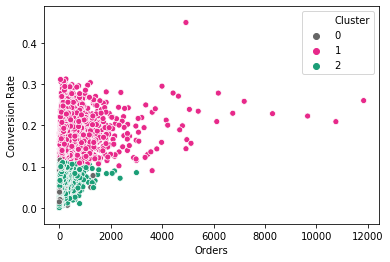

In [35]:
# I can do this by specifying the 'hue' parameter in the same scatterplot function: 
sns.scatterplot(x = topsellshider_nrs['Orders'], y = topsellshider_nrs['Conversion Rate'], 
                hue = topsellshider_nrs['Cluster'], 
               palette= 'Dark2_r')

Looks like k-means separated variables rather neatly. and, looking closer, it seems that conversion rate slightly above 0.1 becomes a threshold between clusters 1 and 2.

Now let's have a look what it will look like if we change columns inspected - how will cluster distribution change:

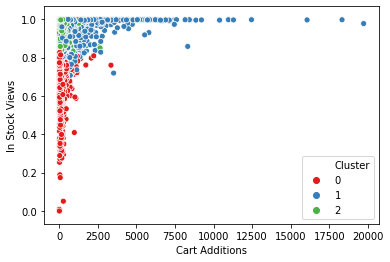

In [36]:
sns.scatterplot(x = topsellshider_nrs['Cart Additions'], y = topsellshider_nrs['In Stock Views'], 
                hue = topsellshider_nrs['Cluster'], 
               palette="Set1")

I have to say - it looks quite clear-cut as well - first cluster hugging the near 0 cart additions, while 3rd cluster having very high in stock views and larger amount of cart additions.

Let's inspect In Stock Views vs Product Views:

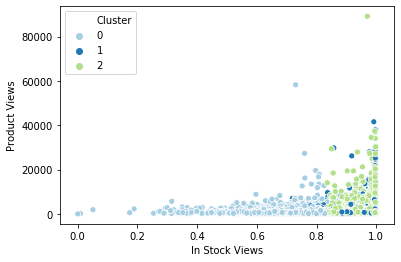

In [37]:
sns.scatterplot(x = topsellshider_nrs['In Stock Views'], y = topsellshider_nrs['Product Views'], 
                hue = topsellshider_nrs['Cluster'], 
               palette="Paired")

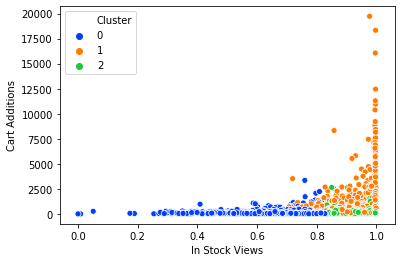

In [38]:
#And finally let's look at cart additions vs in stock views:
sns.scatterplot(x = topsellshider_nrs['In Stock Views'], y = topsellshider_nrs['Cart Additions'], 
                hue = topsellshider_nrs['Cluster'], 
               palette="bright")

## Determine the optimal number of clusters k

Above, we arbitrarily chose to segment our data into three clusters (k = 3). However, this value of may not create the optimal clustering for our data. 

**Note on optimisation**
In order to optimise for anything in machine learning, we need a numerical metric (a number). In distance-based clustering like kmeans, there are are a few metrics we can choose to optimise. Most commonly, the ones used are:
- <u>Within cluster distance</u>: This is calculated by summing the squared distances between each point and its nearest cluster centroid (i.e. the centroid of the cluster to which it belongs).
- <u>Silhouette coefficient</u>: A metric that compares how close a data point is to all other points within the same cluster (on average) vs. how close it is to other points (on average) in the nearest cluster that the data point does not belong to.

For how the silhouette coefficient is calculated, [scikit-learn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) of the `silhouette_score` function is a great start.

However, for now we want to focus on within cluster sum-of-squares error (or WSS - within-cluster sum of squares) as our optimization metric. To do this we use what's called the 'elbow test' for different values of k.

In [39]:
# Idea: peform k-means clustering for various k, and compute the WSS each time

# create a list of the different values of k to test. Could also use: list(range(1,10))
num_clusters = [1,2,3,4,5,6,7,8,9,10]

# create a kmeans model for each value of k. Could use a regular for loop, but let's use a "list comprehension"!
kmeans_list = [KMeans(n_clusters = i) for i in num_clusters]

# For each value of k, fit the model with our data and use the "inertia" method of KMeans to compute the WSS
scores = [kmeans_list[i-1].fit(data_scaled).inertia_ for i in num_clusters]


# Optional 
# We can choose to normalise the scores with respect to the score for k=1 (the highest score)
scores_normalised = scores/scores[0]

Text(0.5, 1.0, 'Elbow test')

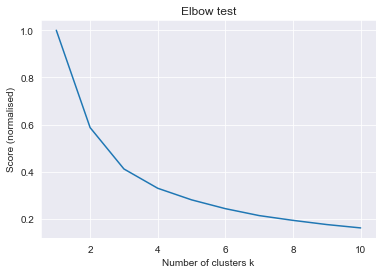

In [40]:
# We can choose to set a grid
sns.set_style('darkgrid')

# Use the lineplot function from seaborn
sns.lineplot(num_clusters, scores_normalised)


# Add a title and axis labels
plt.xlabel("Number of clusters k")
plt.ylabel("Score (normalised)")
plt.title("Elbow test")

It would seem that optimal number k of cluster would be from 4 to 6. Once k is larger than 6 custers, RSS doesn't really drop off that much.

In [41]:
# create the KMeans model object with a number of clusters k = 6:
model2 = KMeans(n_clusters = 6, random_state= 123)

In [42]:
# fit the model to our scaled data. 
model2.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [43]:
# look at the cluster labels for the data points
model.labels_

array([1, 1, 2, ..., 0, 2, 2])

In [44]:
# add a column to the dataframe called "Cluster" which tells us which cluster each data point belongs to
topsellshider_nrs["ClusterK6"] = model2.labels_.astype(int)

In [45]:
topsellshider_nrs.head()

,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate,Cluster,ClusterK6
0,43371,28655,0.996,16065,9658,0.2227,1,4
1,40171,41566,0.992,6666,3611,0.0899,1,4
2,79286,89157,0.970,2373,789,0.0100,2,4
3,8704,8340,0.933,2245,1517,0.1743,1,5
4,9605,9731,0.997,2152,1556,0.1620,1,5


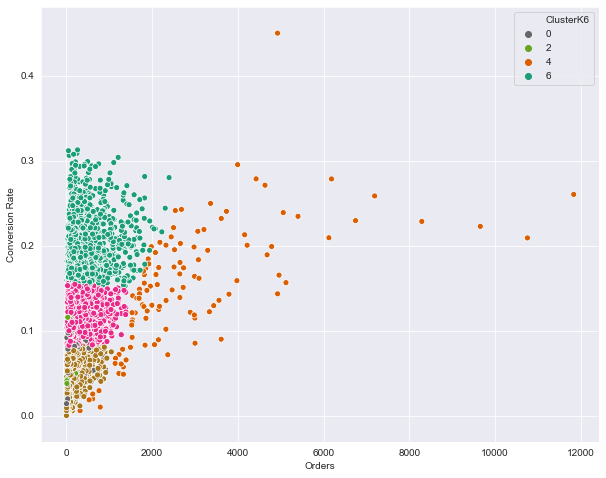

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = topsellshider_nrs['Orders'], y = topsellshider_nrs['Conversion Rate'], 
                hue = topsellshider_nrs['ClusterK6'], 
               palette= 'Dark2_r')

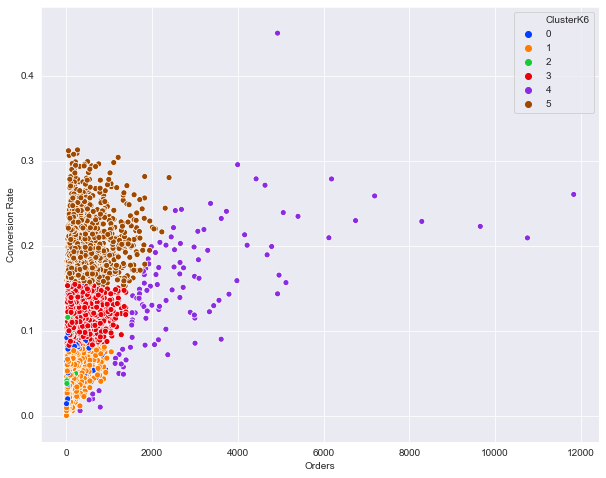

In [47]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = topsellshider_nrs['Orders'], y = topsellshider_nrs['Conversion Rate'], 
                hue = topsellshider_nrs['ClusterK6'], 
               palette= 'bright')

 Hmm - it would appear that in this case k=3 resulted in neater clustering than with 6 clusters.

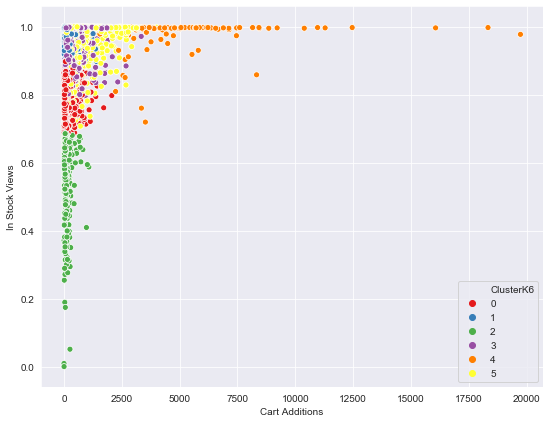

In [48]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = topsellshider_nrs['Cart Additions'], y = topsellshider_nrs['In Stock Views'], 
                hue = topsellshider_nrs['ClusterK6'], 
               palette="Set1")

In the case above - Cart Additions vs In Stock Views - increasing k to 6 resulted in more refined clusters.

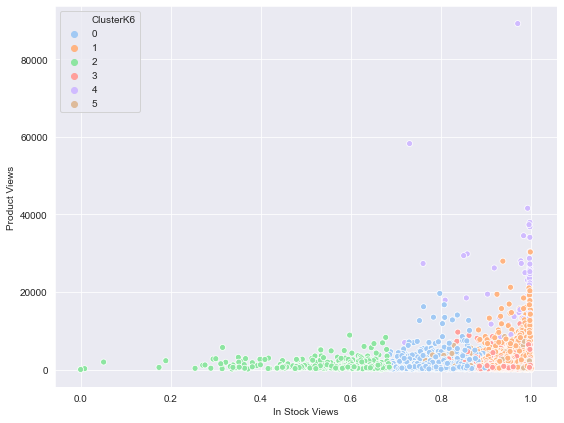

In [49]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = topsellshider_nrs['In Stock Views'], y = topsellshider_nrs['Product Views'], 
                hue = topsellshider_nrs['ClusterK6'], 
               palette="pastel")

Also in the case of comparing Product Views with In Stock Views increasing numer of cluster yielded improvements (less outliers "invading" adjacent clusters)

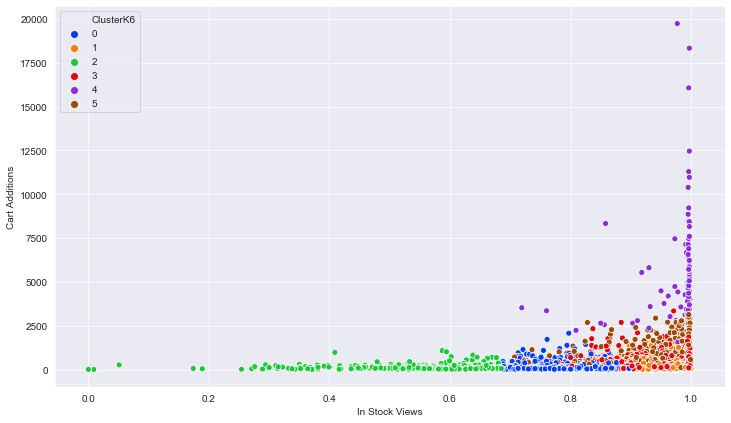

In [50]:
#And finally let's look - again -  at cart additions vs in stock views:
plt.figure(figsize=(12,7))
sns.scatterplot(x = topsellshider_nrs['In Stock Views'], y = topsellshider_nrs['Cart Additions'], 
                hue = topsellshider_nrs['ClusterK6'], 
               palette="bright")

Mixed results here: while reds seems to competing with oranges and browns, k=6 delivered neater split of remaining values across green, purple and blue clusters.

## Conclusions:

So far there isn't anything obvious popping up and begging for a deep dive.
That could be due to multi-dimensional analysis performed above.

#### Reducing the dimensions:

How can we visualize the clustering differently? Well, we cannot do it directly if we have more than 3 columns (which we did - above). However, we can apply a Principal Component Analysis to reduce the space into 2 columns and visualize this instead.

In order to do that, we'll need to run PCA (Principal Component Analysis) on the data and reduce the dimensions in pca_num_components dimensions:

In [51]:
#First we need to import PCA component:
from sklearn.decomposition import PCA

In [52]:
topsellshider_nrs.head()

,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate,Cluster,ClusterK6
0,43371,28655,0.996,16065,9658,0.2227,1,4
1,40171,41566,0.992,6666,3611,0.0899,1,4
2,79286,89157,0.970,2373,789,0.0100,2,4
3,8704,8340,0.933,2245,1517,0.1743,1,5
4,9605,9731,0.997,2152,1556,0.1620,1,5


In [53]:
topsellshider_nrs2 = topsellshider_nrs.drop(['Cluster', 'ClusterK6'], axis=1)

In [54]:
topsellshider_nrs2.head()

,Visits,Product Views,In Stock Views,Cart Additions,Orders,Conversion Rate
0,43371,28655,0.996,16065,9658,0.2227
1,40171,41566,0.992,6666,3611,0.0899
2,79286,89157,0.970,2373,789,0.0100
3,8704,8340,0.933,2245,1517,0.1743
4,9605,9731,0.997,2152,1556,0.1620


In [55]:
pca = PCA(n_components=6)

In [56]:
principalComponents = pca.fit_transform(data_scaled)

([<matplotlib.axis.XTick at 0x1d60f111708>,
 <a list of 6 Text xticklabel objects>)

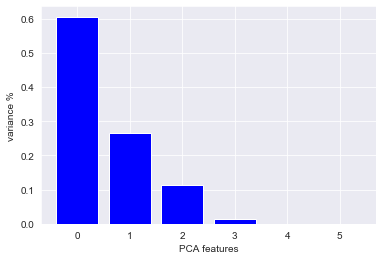

In [57]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_,color='blue' )
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

We can see that only 3 main features (0,1,2) will be enough to explain the majority of the variance in our data. After feature 2, the variance in data drops significantly and feature 3 (4th feature) won't add much depth to our dataset.

In [58]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

To help visualize this, i'll quickly plot just the first 2 features. That's in order to observe if there are any clear clusters:

Text(0, 0.5, 'PCA 2')

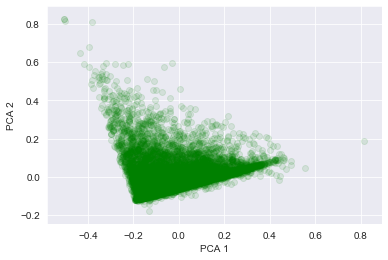

In [59]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='green')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

Let's do the same - only this time for 2nd and 3rd feature of our dataset (so PCA feature 1 and 2 in the blue bar graph above):

Text(0, 0.5, 'PCA 2')

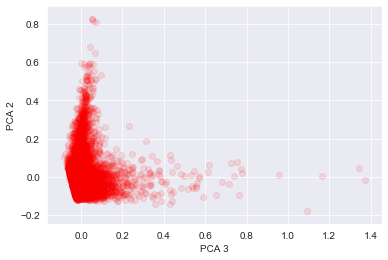

In [60]:
plt.scatter(PCA_components[2], PCA_components[1], alpha=.1, color='red')
plt.xlabel('PCA 3')
plt.ylabel('PCA 2')

Here I can see that there is a concetration of observations clystered  tightly together towards lower left corner of the graph.

As as next step, I'll fit these principal components to the k-means algorithm and determine the best number of clusters. 
Arriving at the perfect number of clusters for our k-means model can be accomplished by measuring the sum of the squared distances to the nearest cluster center - also known as **inertia**. 
Much like the bar plot for variance in PCA features, the k-means line plot below will indicate % (the percentage) of variance explained, but in somewhat different terms, as a function of the number of clusters:

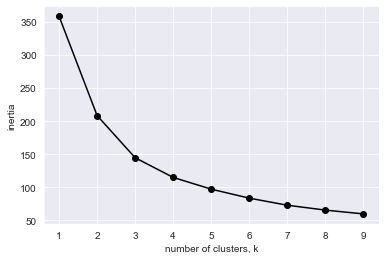

In [61]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model3 = KMeans(n_clusters=k)
    
    # Fit model to samples
    model3.fit(PCA_components.iloc[:,:3])
  # Append the inertia to the list of inertias
    inertias.append(model3.inertia_)
#blank
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

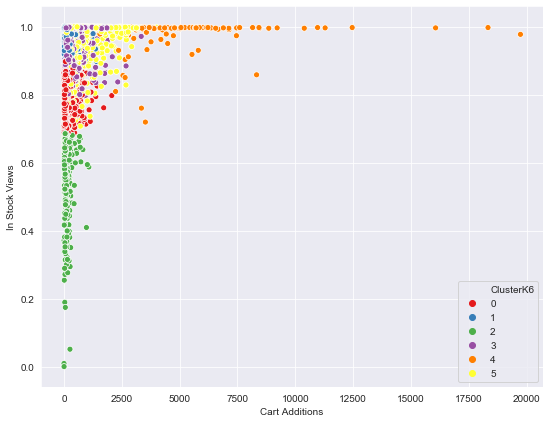

In [62]:
plt.figure(figsize=(9,7))
sns.scatterplot(x = topsellshider_nrs['Cart Additions'], y = topsellshider_nrs['In Stock Views'], 
                hue = topsellshider_nrs['ClusterK6'], 
               palette="Set1")

In [63]:
# create the KMeans model object with a number of clusters k = 6:
model4 = KMeans(n_clusters = 4, random_state= 321)

In [64]:
model4.fit(PCA_components)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=321, tol=0.0001, verbose=0)

In [65]:
model4.labels_

array([2, 0, 3, ..., 1, 3, 0])

In [66]:
PCA_components["Clusters4"] = model4.labels_.astype(int)

In [67]:
PCA_components.sample(12)

,0,1,2,3,4,5,Clusters4
3123,-0.188280,0.135084,0.005901,-0.004904,-0.000424,-0.000036,1
11012,-0.122557,0.046328,-0.000951,-0.002632,0.000540,-0.000230,3
7823,-0.166323,0.022846,-0.004841,-0.007608,0.000936,0.000138,3
7450,0.194961,0.007522,-0.032692,0.006240,0.000465,0.001276,2
945,0.238817,0.104038,0.145325,-0.034117,0.006297,0.001353,2
1138,0.040766,-0.038636,-0.009965,-0.000776,-0.000785,-0.000014,0
8634,-0.090266,-0.081805,-0.020006,-0.009027,0.001076,0.000630,3
6004,0.321200,0.056449,-0.034283,0.013119,0.000669,-0.000997,2
3282,-0.048669,0.251773,-0.021336,0.004132,0.000227,-0.000148,1
3293,0.142055,0.038566,-0.018279,0.005517,0.000062,-0.001176,2


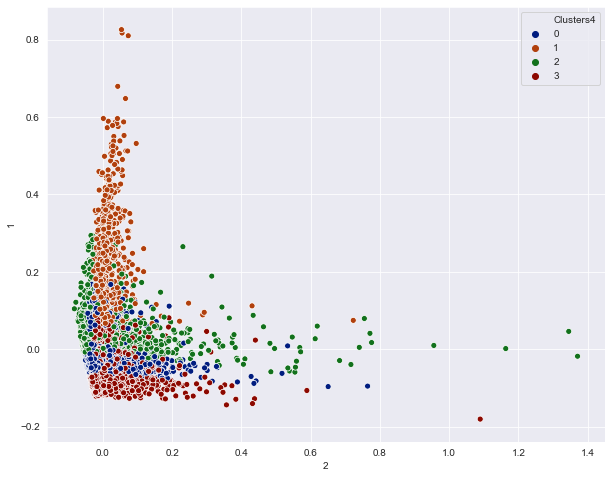

In [68]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = PCA_components[2], y = PCA_components[1], 
                hue = PCA_components['Clusters4'], 
               palette= 'dark')

We are getting more homogeneity and therefore more order but it's still not what I'd like to see.

Let's try it one more time. This time let's try to juxtapose feature 1 and feature 2 with the most variance from our reduced dimensionality featurees (PCA 0 and PCA 1 on the same graph):

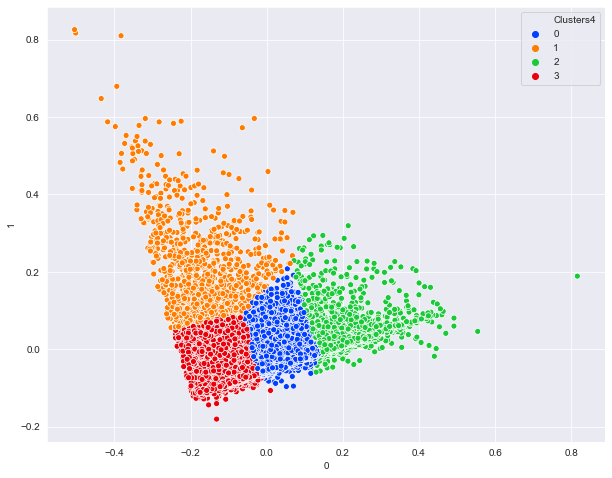

In [69]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = PCA_components[0], y = PCA_components[1], 
                hue = PCA_components['Clusters4'], 
               palette= 'bright')

BINGO!

That's what I was hoping to see. We can observe very neatly ordered clustered with virtually no intrusion of cluster elements into the border of a neighboring cluster. Not sure how to call this state but it resembles a child with OCD who organized lego blocks in a very tidy manner-)

## **Summary:**

As we can see above, that wasn't a straight line journey. Against better judgement, I have decided against making a discretionary call of choosing 2 or 3 at most columns with different product features, instead opting to include all 6 columns with numerical values. 
At first I have started with 3 clusters but that didn't lead me to where I wanted. I have then conducted k number optimization exercise and determined that 6 clusters could be a better idea.While that yielded largely better separation of clusters, it still wasn't what I wanted to see.
Then,I have decided to apply the concept of dimension reduction, drawing upon PCA method in sklearn decomposition module. 
After determining where the variance drop off in features lies, I have run PCA and reduced dimensionality of our dataset and settled for 4 clusters. That finally did the trick.


I haven't labeled the dataset, so we do not know the names of the clusters. This does not mean that one couldn’t go back and label these groupings, though. 

Now that we know how many clusters there are in our data, we have a better sense of how many groups we can label the products with. It’s possible now to come up with a model that grades importance of a product to have in stock in 4 grades. 
Similarly, there could be 4 categories of impact on sales numbers.
Introducing these labels back into the reduced dataset on the unique id of each sample would allow us to visualize them by cluster.

**Next Steps**:  
To implement this into production and to apply it effectively so that Marketing team could adjust their campaign budget and promote those 4 key product categories better, not to mention to arm Inventory Management function with ability to improve our product stocking levels, it next requires somewhat major exercise of manually labeling data points). As it happens, I've been approached recently by couple of organizations that offer mas labeling services to enterprises so I am happy to engage them in the dialogue about commercial terms of such exercise.
